In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1) 載入資料集

In [2]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_data = df_data.drop(labels=['Id'],axis=1) # 移除Id
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

ex:

|  Iris-setosa |  Iris-versicolor | Iris-virginica  |
|:---:|:---:|:---:|
|  1 | 2  | 3  |

In [3]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)

In [4]:
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

```python
# 移除缺失值
train=train.dropna()
```

In [5]:
X = df_data.drop(labels=['Species','Class'],axis=1).values # 移除Species (因為字母不參與訓練)
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


## 4) 切割訓練集與測試集

In [6]:
from sklearn.model_selection import train_test_split
X=df_data.drop(labels=['Class','Species'],axis=1)
y=df_data['Class'].values
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=42)

In [7]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


## 建立 Logistic regression 模型
羅輯回歸是由線性回歸變化而來的，屬判別模型適合解決二元分類問題。

Parameters:
- penalty: 正規化l1/l2，防止模型過度擬合。
- C: 數值越大對 weight 的控制力越弱，預設為1。
- n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
- solver: 優化器的選擇。newton-cg,lbfgs,liblinear,sag,saga。預設為liblinear。
- max_iter: 迭代次數，預設為100代。
- class_weight: 若遇資料不平衡問題可以設定balance，預設=None。
- random_state: 亂數種子僅在solver=sag/liblinear時有用。

Attributes:
- coef_: 取得斜率。
- intercept_: 取得截距。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- predict_proba: 預測每個類別的機率值。
- score: 預測成功的比例。![image.png](attachment:image.png)

In [8]:
from sklearn.linear_model import LogisticRegression

# 建立Logistic模型
logisticModel = LogisticRegression(random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = logisticModel.predict(X_train)

## 使用Score評估模型

In [9]:
# 預測成功的比例
print('訓練集: ',logisticModel.score(X_train,y_train))
print('測試集: ',logisticModel.score(X_test,y_test))

訓練集:  0.9619047619047619
測試集:  1.0


## 真實分類

In [10]:
# 建立訓練集的 DataFrme
df_train=pd.DataFrame(X_train)
df_train['Class']=y_train
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test)
df_test['Class']=y_test

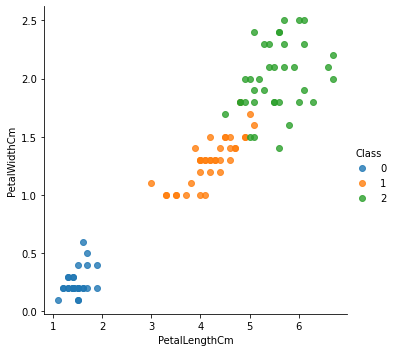

In [11]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Class', data=df_train, fit_reg=False)

## Logistic regression (訓練集)預測結果

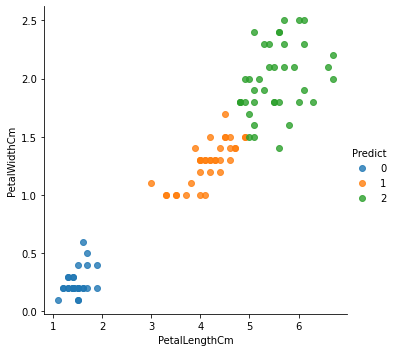

In [12]:
df_train['Predict']=predicted
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_train, hue="Predict", fit_reg=False)
plt.show()